<a href="https://colab.research.google.com/github/JoysgitHub/AI-COLLAB/blob/main/CNN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/5
1875/1875 [==============================] - 412s 218ms/step - loss: 0.1316 - accuracy: 0.9630 - val_loss: 0.0456 - val_accuracy: 0.9871
Epoch 2/5
1875/1875 [==============================] - 396s 211ms/step - loss: 0.0640 - accuracy: 0.9825 - val_loss: 0.0400 - val_accuracy: 0.9892
Epoch 3/5
1875/1875 [==============================] - 393s 210ms/step - loss: 0.0550 - accuracy: 0.9854 - val_loss: 0.0351 - val_accuracy: 0.9898
Epoch 4/5
1875/1875 [==============================] - 395s 211ms/step - loss: 0.0434 - accuracy: 0.9883 - val_loss: 0.0325 - val_accuracy: 0.9903
Epoch 5/5
313/313 [==============================] - 16s 51ms/step - loss: 0.0320 - accuracy: 0.9914
Test accuracy: 0.9914
313/313 [==============================] - 16s 51ms/step
Precision: 99.15 %
Recall: 99.13 %
F1-score: 99.14 %
Execution time: 2006.29 seconds
Confusion Matrix:


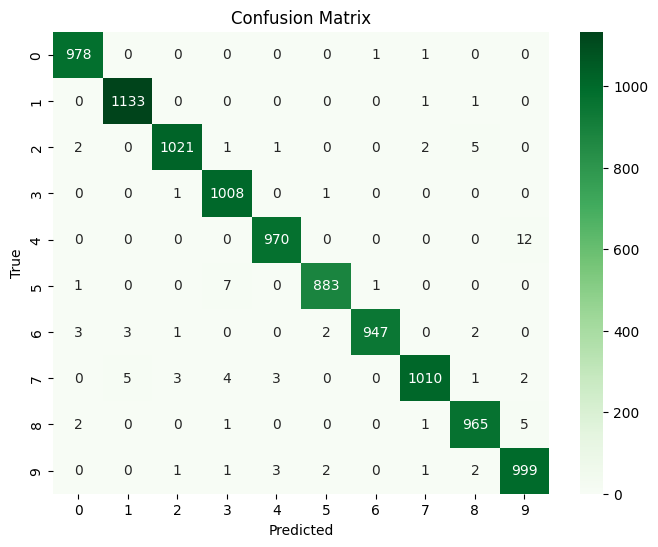

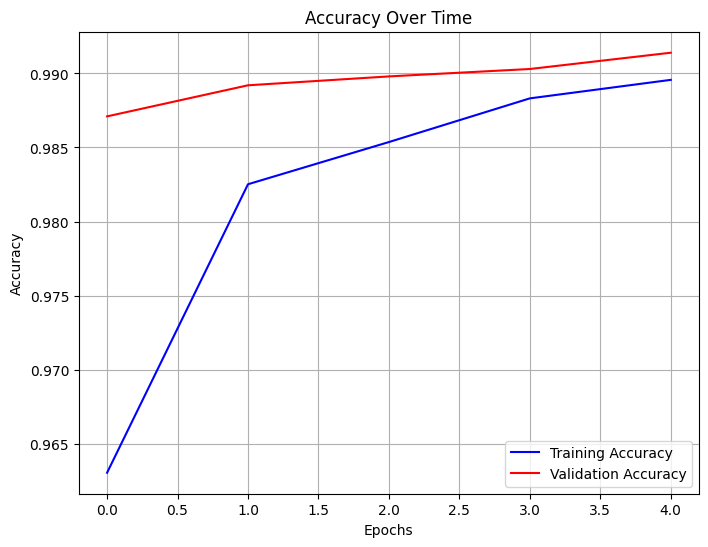

In [6]:
import tensorflow as tf  # Imports TensorFlow, a machine learning library
from tensorflow.keras import datasets, layers, models  # Imports specific submodules from Keras for datasets, layers, and models
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix  # Imports performance metrics from scikit-learn
import numpy as np  # Imports NumPy, a library for numerical operations
import matplotlib.pyplot as plt  # Imports Pyplot from Matplotlib for plotting graphs
import time  # Imports the time module to measure execution time
import seaborn as sns  # Imports Seaborn, a library for statistical data visualization

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
# This line loads the MNIST dataset, which is a collection of 28x28 pixel grayscale images of handwritten digits, along with their corresponding labels.

# Add a channel dimension, and normalize pixel values to be between 0 and 1
train_images = np.expand_dims(train_images, axis=-1) / 255.0
test_images = np.expand_dims(test_images, axis=-1) / 255.0
# These lines add an extra dimension to the image arrays to represent the color channel (even though MNIST is grayscale) and normalize the pixel values to be between 0 and 1 for better neural network performance.

start_time = time.time()
# This line records the current time, which will be used later to calculate the total execution time of the model training.

# Data augmentation
# strategy to increase the diversity of your training data and reduce overfitting
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal"),
    layers.experimental.preprocessing.RandomRotation(0.2),
    layers.experimental.preprocessing.RandomZoom(0.1),
])
# This block defines a data augmentation strategy using a sequential model that includes random horizontal flips,
# rotations, and zooms to the images. Data augmentation helps prevent overfitting by artificially increasing the diversity of the training data.


# Define the convolutional base
model = models.Sequential() #Initializes a new sequential model. Sequential models are a linear stack of layers.

model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)))
# Adds a 2D convolutional layer with 64 filters, a 3x3 kernel size, 'relu' activation function,
#and specifies the input shape for the dataset (28x28 pixels with 1 color channel).
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())

# Add fully connected layers
model.add(layers.Flatten()) # # Changes the shape of the data to a single long list without changing its contents.
model.add(layers.Dense(512, activation='relu')) # Adds a layer with 512 neurons that can capture complex patterns.
model.add(layers.Dropout(0.5)) # Randomly ignores half of the neurons in the previous layer to improve robustness.
model.add(layers.Dense(10, activation='softmax'))  # Adds a layer that decides which of the 10 digit classes the image belongs to.



# Learning rate scheduling
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-3,  # Start with this learning rate
    decay_steps=10000,          # Adjust the rate every 10,000 steps
    decay_rate=0.9              # Reduce the rate to 90% of the current rate
)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
# Use the Adam optimizer with the above learning rate schedule

# Compile the model
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',  # Use this loss function for multi-class classification
              metrics=['accuracy'])                    # Track accuracy during training


# Early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
# Stops training when the model doesn't improve for 5 epochs and restores the best weights.

# Train the model
history = model.fit(train_images, train_labels, epochs=2,
                    validation_data=(test_images, test_labels))
# Trains the model for 2 epochs using the training data and also evaluates it on the test data.

# End timing
end_time = time.time()  # Record the end time of model evaluation
execution_time = end_time - start_time  # Calculate the total execution time
# Calculates how long it took to train and evaluate the model.


# Evaluate on test data
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc:.4f}")

# Calculate precision, recall, and F1-score
y_pred1 = model.predict(test_images)
y_pred = np.argmax(y_pred1, axis=1)
precision = precision_score(test_labels, y_pred, average='macro')
recall = recall_score(test_labels, y_pred, average='macro')
f1 = f1_score(test_labels, y_pred, average='macro')
print(f"Precision: {precision * 100:.2f} %")
print(f"Recall: {recall * 100:.2f} %")
print(f"F1-score: {f1 * 100:.2f} %")

print(f"Execution time: {execution_time:.2f} seconds")  # Print total execution time


# Create and visualize the confusion matrix
conf_matrix = confusion_matrix(test_labels, y_pred)

# Create and visualize the confusion matrix
conf_matrix = confusion_matrix(test_labels, y_pred)
print("Confusion Matrix:")
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', xticklabels=[0,1,2,3,4,5,6,7,8,9], yticklabels=[0,1,2,3,4,5,6,7,8,9])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

#print(conf_matrix)

# Plot accuracy over time
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy', color='b')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='r')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Over Time')
plt.legend()
plt.grid(True)
plt.show()